<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-hsgz8426
  Entered build tracker: /tmp/pip-build-tracker-hsgz8426
  Created temporary directory: /tmp/pip-install-92lh25eq
  Created temporary directory: /tmp/pip-ephem-wheel-cache-18zp9i32
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00


In [31]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [32]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [33]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-9.78, -5.34, -2.62, 1.43, 3.17, 4.91, 6.52, 7.98, 9.09, 9.91, -0.53, -0.27, -0.12, 0.14, 0.46, 0.82, 1.13, 1.49, 1.83, 2.14, -0.03, -0.07, -0.15, 0.06, 0.15, 0.29]


In [34]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [35]:
# def sphere(x):
#     return sum(x**2)

In [36]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [38]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [39]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [40]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [41]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [42]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [43]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [44]:
costs = []
errors = []

In [45]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [46]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


100
Iteration 1: Best Cost = 63752.937872969494


<ipython-input-37-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-34-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4317.89999723 -4317.89999728 -4317.89999769 -4317.89999853
 -4317.89999853 -4317.89999861 -4317.89999861 -4317.89999873
 -4317.89999873 -4317.89999883 -4317.89999907 -4317.89999907
 -4317.8999992  -4317.8999992  -4317.8999992  -4317.8999992
 -4317.89999926 -4317.89999926 -4317.89999928 -4317.8999993
 -4317.89999934 -4317.89999938 -4317.89999941 -4317.89999952
 -4317.89999952 -4317.89999957 -4317.89999964 -4317.89999972
 -4317.89999973 -4317.89999974 -4317.89999976 -4317.89999976
 -4317.89999976 -4317.89999976 -4317.89999976 -4317.89999977
 -4317.89999979 -4317.89999981 -4317.89999981 -4317.89999983
 -4317.89999983 -4317.89999983 -4317.89999983 -4317.89999987
 -4317.89999987 -4317.89999987 -4317.89999987 -4317.89999989
 -4317.8999999  -4317.8999999  -4317.8999999  -4317.89999994
 -4317.89999994 -4317.89999995 -4317.89999995 -4317.89999995
 -4317.89999995 -4317.89999996 -4317.89999996 -4317.89999996
 -4317.89999996 -4317.89999997 -4317

In [47]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

1.0663825378287584e-10
0.3208790335976346
1.1604602548231924e-05
1.6017628468034673e-07
1.250975807894804
1.308939706176517
778.6851051043666
1688.3171665985674
1059.9795115634568
8174.340605892545
29146.374519353227
14851.08949615165
1227.284796831182
15523.644492157726
6.228254029560873
682.1000000000104
682.1006633723864
23941.049189450838
10571.583593731184
5.304499312185243
5.000616187076886
75895.46174550148
45.501996083910434
119.93356458803332





Problem 1 Best Cost: [ 6.37529379e+04  4.87094375e+04  4.17684269e+04  3.17859297e+04
  2.47709038e+04  1.98748602e+04  1.86987438e+04  1.74872152e+04
  1.61494800e+04  1.17004439e+04  8.35779417e+03  6.41516378e+03
  6.07292384e+03  5.23018535e+03  3.00940619e+03  1.88899776e+03
  1.88899776e+03  9.64046908e+02  6.73853614e+02  4.01075558e+02
  1.61942365e+02  1.61942365e+02  1.31761478e+02  1.35662834e+01
 -1.76062128e+02 -1.76062128e+02 -2.43877755e+02 -3.65621113e+02
 -4.03981971e+02 -4.81185219e+02 -5.56699198e+02 -5.56699198e+02
 -5.82128384e+02 -7.41154142e+02 -7.41154142e+02 -7.41154142e+02
 -7.41154142e+02 -7.41154142e+02 -7.41154142e+02 -7.75640329e+02
 -7.96671750e+02 -7.96671750e+02 -9.06209631e+02 -9.47984140e+02
 -9.47984140e+02 -9.47984140e+02 -9.47984140e+02 -9.49400440e+02
 -9.49400440e+02 -9.50684360e+02 -9.50684360e+02 -9.55608108e+02
 -9.69464420e+02 -9.69464420e+02 -9.69464420e+02 -9.70646966e+02
 -9.88657276e+02 -9.88657276e+02 -9.97692984e+02 -9.97692984e+02
 

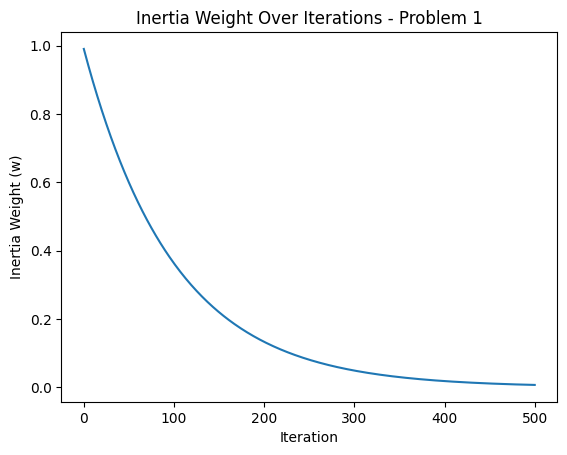

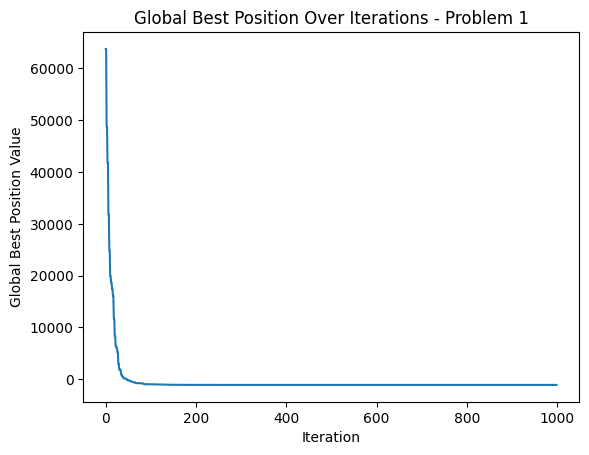




Problem 2 Best Cost: [-701.39488053 -701.41010486 -701.43491546 -701.45714003 -701.50101795
 -701.52483255 -701.54396396 -701.55075392 -701.56119221 -701.58499709
 -701.60578969 -701.61186724 -701.62094338 -701.63061023 -701.64565584
 -701.64688    -701.66120963 -701.6818737  -701.70699553 -701.70699553
 -701.70699553 -701.71758761 -701.72158288 -701.72158288 -701.72202737
 -701.72640254 -701.72640254 -701.75366153 -701.76285211 -701.76917142
 -701.76917142 -701.78586763 -701.78586763 -701.79860814 -701.79860814
 -701.79860814 -701.79860814 -701.80875777 -701.80875777 -701.82275332
 -701.82275332 -701.82563379 -701.82563379 -701.83095211 -701.84648411
 -701.84648411 -701.86010439 -701.86010439 -701.86010439 -701.87745606
 -701.88424949 -701.88424949 -701.88424949 -701.88424949 -701.8866627
 -701.89163855 -701.90745145 -701.90745145 -701.90985297 -701.90985297
 -701.90985297 -701.90985297 -701.91383226 -701.92347033 -701.93001772
 -701.93001772 -701.93116812 -701.93116812 -701.936780

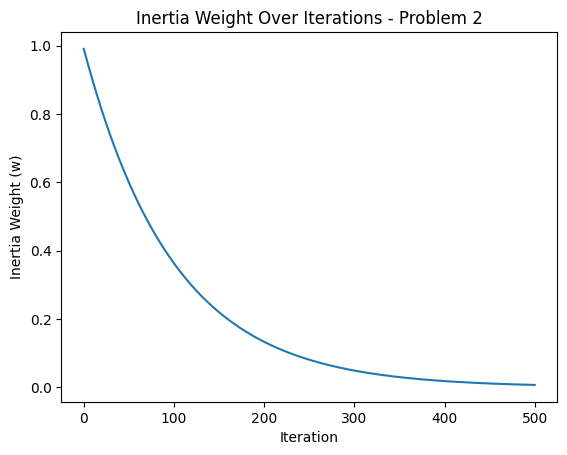

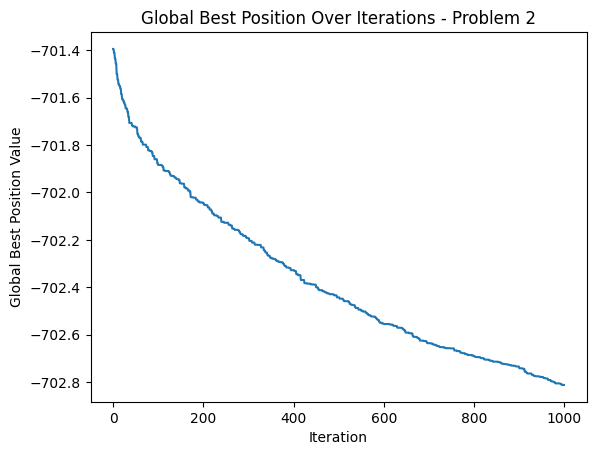




Problem 3 Best Cost: [ 3.67084813e+10  2.94231534e+10  2.49664284e+10  1.74137987e+10
  1.26126044e+10  1.11697265e+10  7.58816692e+09  6.32631666e+09
  5.57791924e+09  3.49799188e+09  3.31743636e+09  2.51701805e+09
  1.90730790e+09  1.71703902e+09  1.26749313e+09  1.08151906e+09
  1.08151906e+09  9.63911613e+08  9.63911613e+08  8.08451752e+08
  6.15996391e+08  4.57725876e+08  4.56514152e+08  4.56514152e+08
  4.56514152e+08  4.01395098e+08  3.56530907e+08  3.56530907e+08
  3.34936400e+08  2.94113467e+08  2.90366899e+08  2.90366899e+08
  2.07657065e+08  1.85785552e+08  1.85785552e+08  1.85785552e+08
  1.73199933e+08  1.55871000e+08  1.49304281e+08  8.71153219e+07
  8.71153219e+07  8.71153219e+07  8.14398683e+07  6.87233815e+07
  6.87233815e+07  6.44992138e+07  6.44992138e+07  6.34373626e+07
  6.34373626e+07  6.34373626e+07  6.01201277e+07  5.36130474e+07
  4.24753822e+07  4.04346024e+07  4.04346024e+07  4.01757479e+07
  4.01757479e+07  4.01757479e+07  4.01757479e+07  2.92190892e+07
 

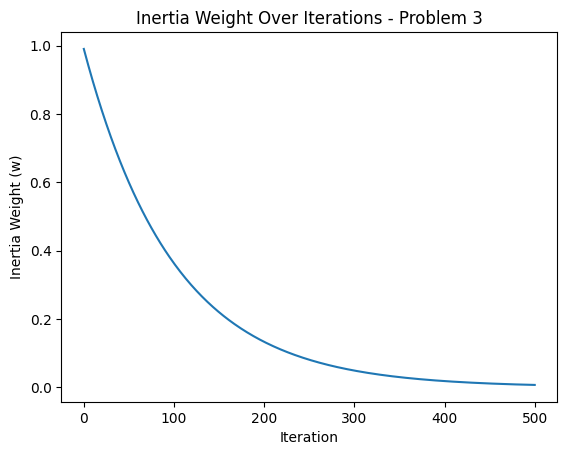

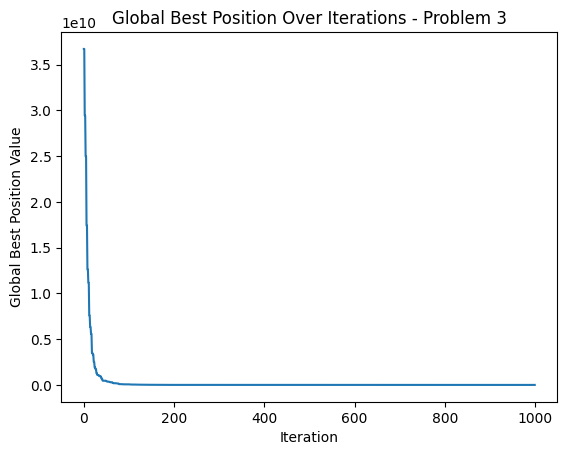




Problem 4 Best Cost: [ 2.93150550e+05  2.27634623e+05  1.78815111e+05  1.54647616e+05
  1.04316581e+05  1.00850370e+05  8.37740408e+04  7.56109857e+04
  5.54586197e+04  4.81598330e+04  3.64717503e+04  3.20595825e+04
  2.43047531e+04  2.43047531e+04  1.89051457e+04  1.65722631e+04
  1.40701927e+04  1.08979972e+04  1.08979972e+04  1.05555801e+04
  1.05555801e+04  1.05555801e+04  9.73813103e+03  8.24335934e+03
  7.04196093e+03  6.96276679e+03  5.04360144e+03  4.23141840e+03
  3.50754521e+03  3.50754521e+03  3.06430355e+03  2.78407888e+03
  2.28707524e+03  1.87309165e+03  1.40431437e+03  1.37819830e+03
  1.00118793e+03  8.79756947e+02  8.79756947e+02  8.10693209e+02
  5.89319704e+02  5.89319704e+02  5.89319704e+02  4.96758911e+02
  4.96758911e+02  4.54625042e+02  4.54625042e+02  4.23983943e+02
  1.12420071e+02  1.12420071e+02  1.12420071e+02  1.10021316e+02
  1.10021316e+02  1.10021316e+02  1.05910704e+02  9.01611192e+01
  4.19320998e+01  3.11166811e+01 -6.08776203e+01 -6.08776203e+01
 

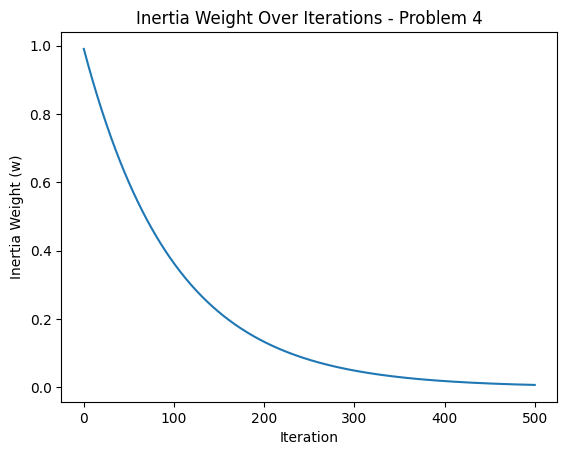

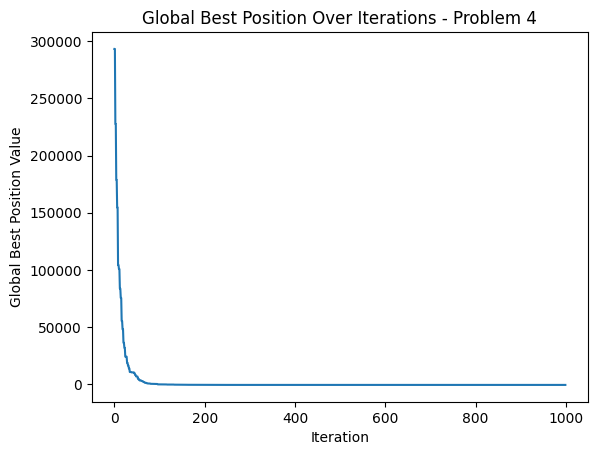




Problem 5 Best Cost: [-334.17835499 -334.23060919 -334.28803034 -334.30397923 -334.33019286
 -334.35706139 -334.36879554 -334.41052268 -334.43735107 -334.47245063
 -334.49734434 -334.50690395 -334.56807116 -334.5771454  -334.58861165
 -334.61314908 -334.64163223 -334.68339883 -334.68339883 -334.68339883
 -334.71529838 -334.72179223 -334.74124023 -334.74617018 -334.75682538
 -334.78005102 -334.79643327 -334.80738738 -334.84279605 -334.84313965
 -334.89371705 -334.89371705 -334.89371705 -334.8966249  -334.91139442
 -334.91139442 -334.91139442 -334.91139442 -334.92133088 -334.94334174
 -334.94334174 -334.94334174 -334.9687156  -334.9687156  -334.97392527
 -334.97392527 -334.98865468 -334.98865468 -335.00433383 -335.00433383
 -335.02107346 -335.03354403 -335.03354403 -335.03354403 -335.03921705
 -335.06990939 -335.06990939 -335.07811067 -335.07811067 -335.08009219
 -335.08964205 -335.08964205 -335.08964205 -335.09743204 -335.12514765
 -335.12514765 -335.12818395 -335.13839919 -335.13888

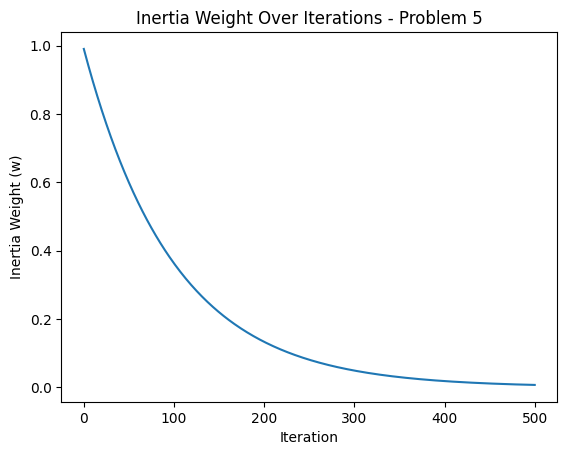

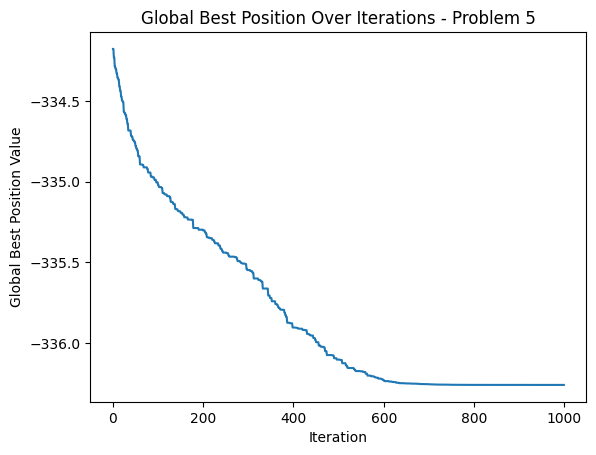




Problem 6 Best Cost: [-183.53856667 -183.59376014 -183.63190609 -183.6868831  -183.76547008
 -183.79917733 -183.79917733 -183.84659104 -183.8940837  -183.90481833
 -183.92094146 -183.94490744 -183.96788966 -183.97961032 -184.00096682
 -184.02474608 -184.03009784 -184.09137458 -184.09257076 -184.1548374
 -184.1548374  -184.15777852 -184.17793014 -184.19641003 -184.19641003
 -184.19641003 -184.20283028 -184.20283028 -184.22962799 -184.23825072
 -184.24928234 -184.26679755 -184.27923325 -184.2839607  -184.28633861
 -184.28633861 -184.28759899 -184.29231837 -184.29231837 -184.29231837
 -184.29231837 -184.29579456 -184.31105784 -184.32045935 -184.32122182
 -184.33126401 -184.33126401 -184.33126401 -184.34401701 -184.34401701
 -184.34401701 -184.34401701 -184.34401701 -184.36212599 -184.36212599
 -184.36212599 -184.37849749 -184.39172886 -184.39690686 -184.42410422
 -184.42527946 -184.44019392 -184.44019392 -184.44019392 -184.4513902
 -184.4639158  -184.4639158  -184.4639158  -184.4639158

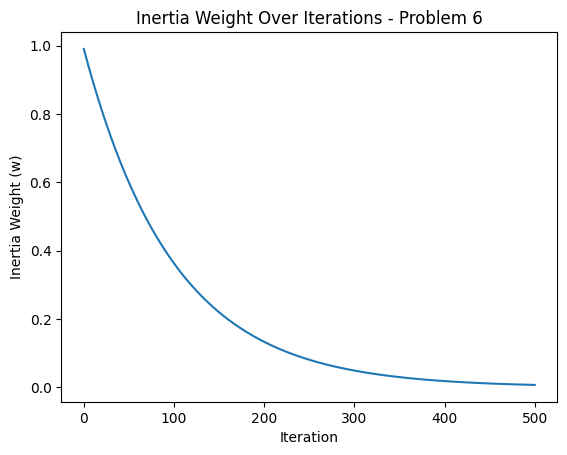

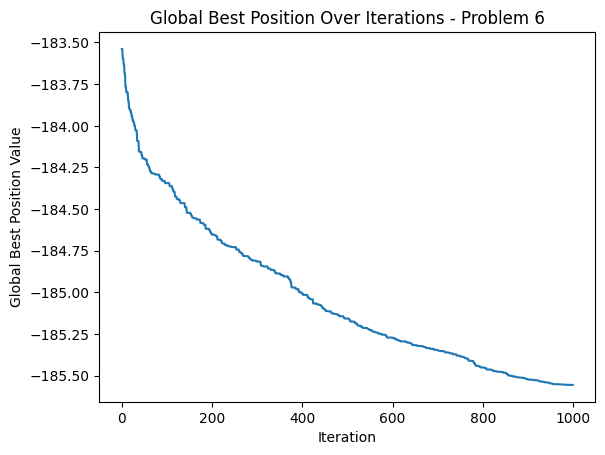




Problem 7 Best Cost: [ 5.76176952e+04  5.46436565e+04  4.67924932e+04  4.64531844e+04
  3.83341003e+04  3.45100002e+04  3.19072830e+04  2.62728689e+04
  2.62728689e+04  2.41605477e+04  2.03008833e+04  1.77994045e+04
  1.77994045e+04  1.77994045e+04  1.77994045e+04  1.39288350e+04
  1.39288350e+04  1.14234975e+04  1.08300518e+04  9.56153947e+03
  8.49263944e+03  8.49263944e+03  8.02928673e+03  8.02928673e+03
  7.86474937e+03  7.86474937e+03  6.75343383e+03  6.75343383e+03
  6.43837694e+03  6.43837694e+03  6.43837694e+03  6.43837694e+03
  6.43837694e+03  6.43837694e+03  6.43837694e+03  6.21672411e+03
  4.88274325e+03  4.83038160e+03  4.83038160e+03  4.57270922e+03
  4.44144409e+03  4.44144409e+03  4.30072809e+03  4.30072809e+03
  4.10105272e+03  4.10105272e+03  4.10105272e+03  4.10105272e+03
  4.10105272e+03  4.10105272e+03  4.10105272e+03  4.03903490e+03
  3.56494232e+03  3.56494232e+03  3.56494232e+03  3.56494232e+03
  3.56494232e+03  3.56494232e+03  3.56494232e+03  3.50510198e+03
 

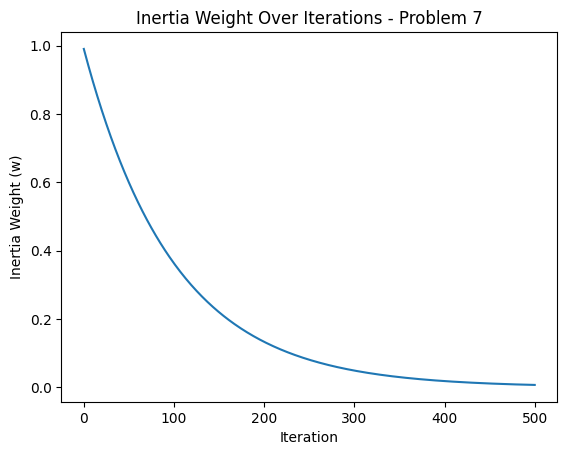

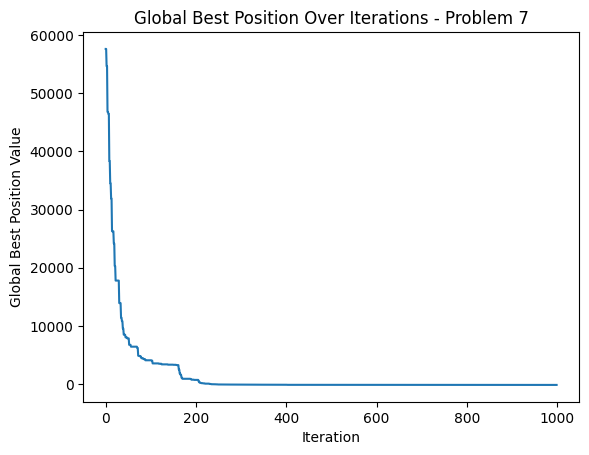




Problem 8 Best Cost: [41834.45552353 34262.88792279 19051.11753601 19051.11753601
 16986.63963756 15047.94861539 15047.94861539 15047.94861539
 15047.94861539 13987.56409121 13987.56409121 13987.56409121
 11085.86604238 11085.86604238 11085.86604238 11085.86604238
 11085.86604238 11085.86604238 11085.86604238 10757.87683559
  9882.44907981  9882.44907981  9882.44907981  9882.44907981
  9882.44907981  9882.44907981  9882.44907981  9882.44907981
  9882.44907981  9882.44907981  9882.44907981  9802.05032082
  9802.05032082  9747.58256277  9411.67464293  9411.67464293
  8640.19412655  8640.19412655  8591.04332334  8591.04332334
  8591.04332334  8591.04332334  8591.04332334  7439.85329444
  7439.85329444  7170.26838845  7170.26838845  7170.26838845
  7170.26838845  7117.79165816  6412.47994661  6310.13578503
  5538.25960392  5538.25960392  5538.25960392  5397.73516058
  5397.73516058  5397.73516058  5397.73516058  4956.90807294
  4491.33376126  4491.33376126  4279.30826838  4279.30826838


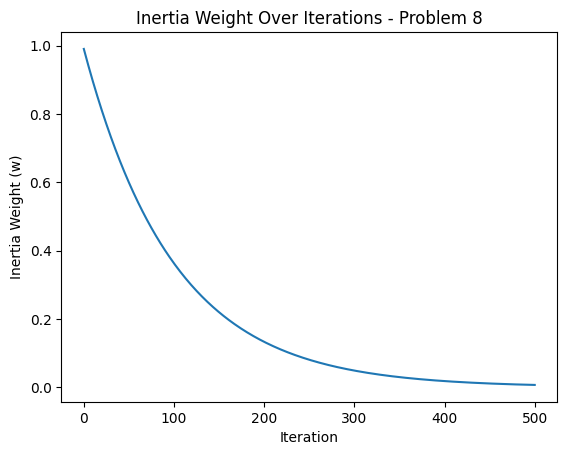

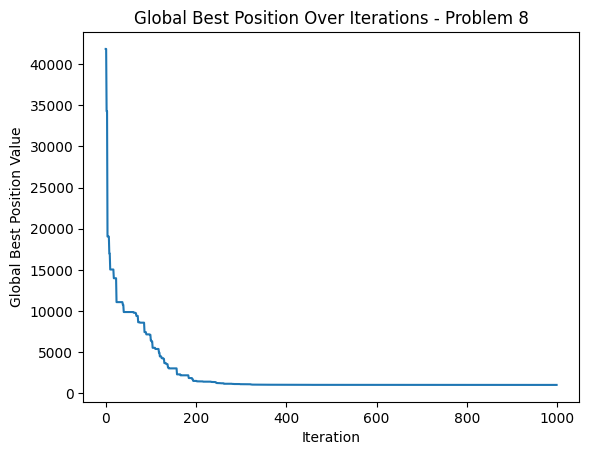




Problem 9 Best Cost: [2.60624138e+05 1.45371075e+05 1.45371075e+05 1.02697482e+05
 1.02697482e+05 1.02697482e+05 1.02697482e+05 1.02697482e+05
 3.99830492e+04 3.99830492e+04 3.99830492e+04 3.99830492e+04
 3.99830492e+04 3.99830492e+04 3.99830492e+04 3.99830492e+04
 3.99830492e+04 3.99830492e+04 3.99830492e+04 3.25792000e+04
 3.25792000e+04 3.18075956e+04 9.52638691e+03 9.52638691e+03
 9.52638691e+03 9.52638691e+03 9.52638691e+03 9.52638691e+03
 9.52638691e+03 9.52638691e+03 9.52638691e+03 9.52638691e+03
 9.52638691e+03 9.52638691e+03 9.52638691e+03 9.52638691e+03
 8.81016949e+03 8.81016949e+03 8.81016949e+03 8.81016949e+03
 8.81016949e+03 8.81016949e+03 8.81016949e+03 8.81016949e+03
 8.81016949e+03 8.81016949e+03 8.15091782e+03 8.15091782e+03
 8.15091782e+03 6.76709369e+03 6.76709369e+03 6.53694881e+03
 6.53694881e+03 6.53694881e+03 4.35366543e+03 4.35366543e+03
 4.35366543e+03 4.35366543e+03 4.35366543e+03 4.35366543e+03
 2.83207748e+03 2.83207748e+03 2.83207748e+03 2.83207748e+03


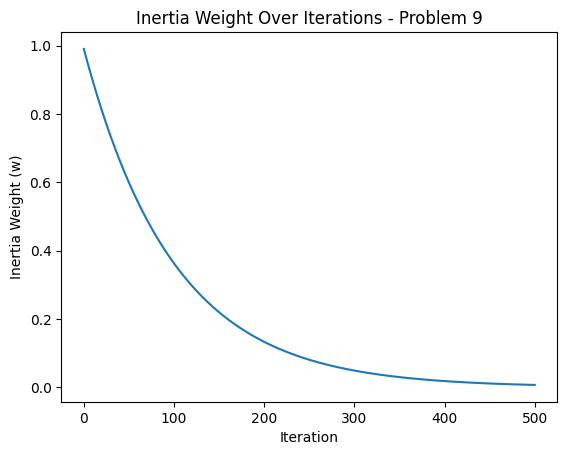

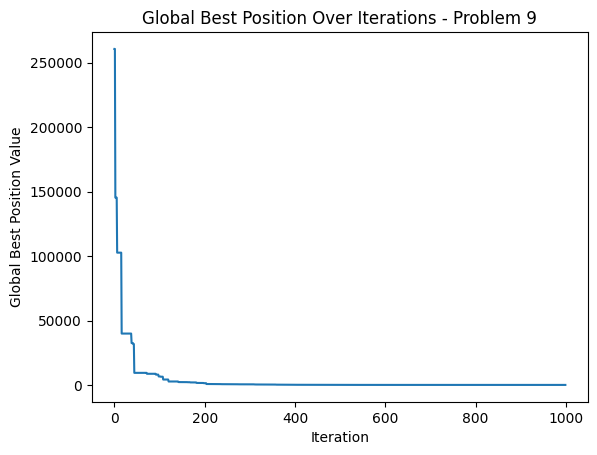




Problem 10 Best Cost: [40878.88349576 38032.71788592 32979.02161193 28526.67608747
 28526.67608747 26922.40011727 26255.00329255 23947.99164105
 22763.11124197 21267.89529058 20912.76243508 20912.76243508
 20912.76243508 20479.75812735 20479.75812735 20397.01797678
 20397.01797678 20397.01797678 18486.79334958 18486.79334958
 18486.79334958 18486.79334958 18486.79334958 18486.79334958
 17723.65128533 17723.65128533 16647.6096389  16647.6096389
 15767.13324442 15417.63070471 15417.63070471 15417.63070471
 15417.63070471 14041.89274186 14041.89274186 14041.89274186
 14041.89274186 14041.89274186 13971.11914597 13971.11914597
 12757.44696971 12757.44696971 12354.09182841 12354.09182841
 12354.09182841 12354.09182841 12354.09182841 12244.42288154
 12244.42288154 12244.42288154 12243.21028673 12243.21028673
 11886.73208121 11886.73208121 11670.12730669 11670.12730669
 11670.12730669 11321.8249343  10798.24271268 10798.24271268
 10798.24271268 10798.24271268 10798.24271268 10431.34210457


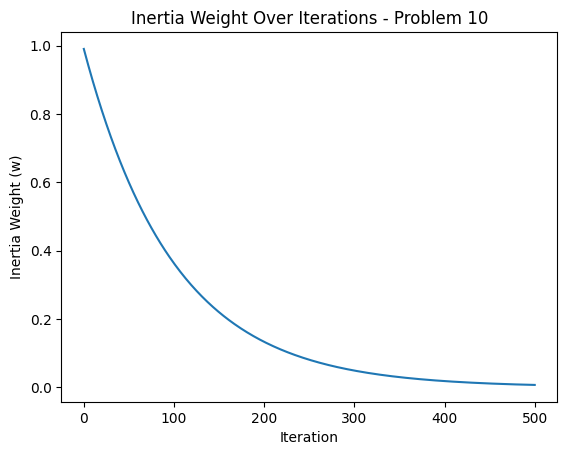

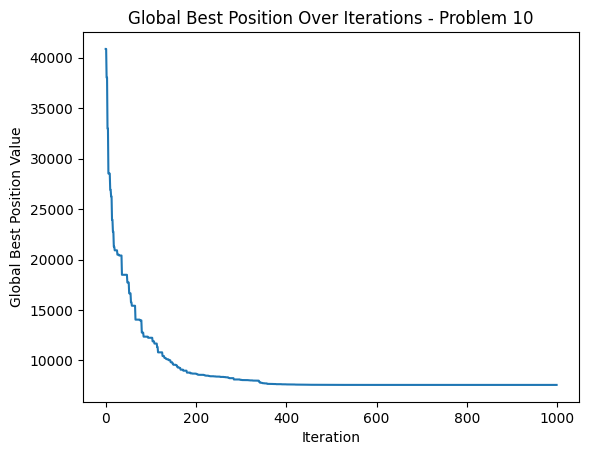




Problem 11 Best Cost: [46542.53458237 45848.00837332 41585.73237451 41585.73237451
 39056.65152388 39056.65152388 39056.65152388 39056.65152388
 39056.65152388 37057.98401345 35561.78306198 34683.8238396
 34683.8238396  34683.8238396  34683.8238396  34683.8238396
 33678.61011924 33678.61011924 33678.61011924 33678.61011924
 32564.73385812 32564.73385812 32564.73385812 32122.30588512
 32122.30588512 32122.30588512 32122.30588512 31816.42776863
 31816.42776863 31816.42776863 31041.52123057 31041.52123057
 30956.58047862 30860.05421902 30860.05421902 30728.46380681
 30650.45954222 30578.90759505 30569.40537925 30451.78115413
 30451.78115413 30451.78115413 30451.78115413 30349.10154702
 30212.23416045 30181.11121682 30181.11121682 30148.27052236
 30074.81474426 30074.81474426 30074.81474426 30031.94544571
 30031.94544571 30023.96547798 30023.96547798 30005.25865308
 29948.46846201 29948.46846201 29948.46846201 29867.9146079
 29841.89170951 29778.88877641 29778.88877641 29745.55003617
 2

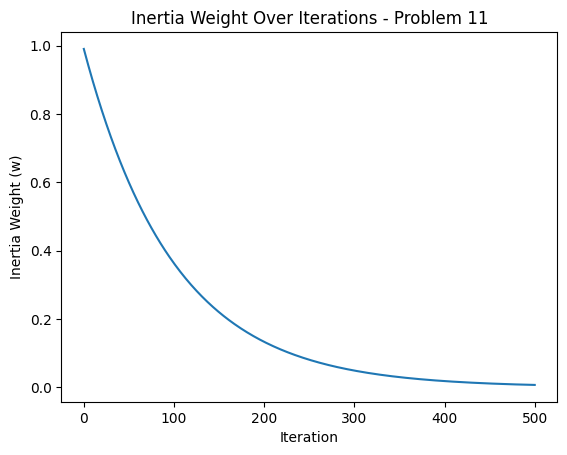

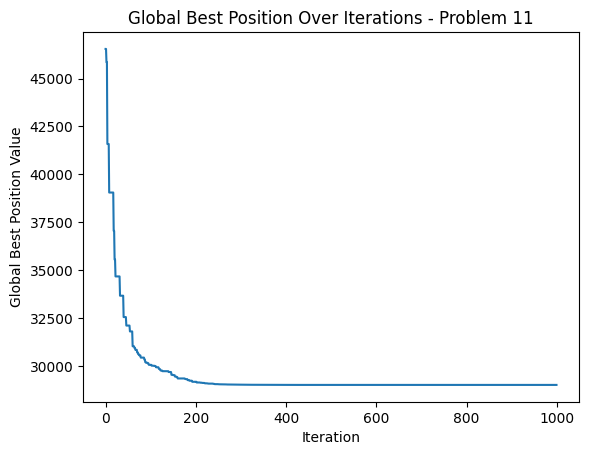




Problem 12 Best Cost: [43985.41072518 43985.41072518 43970.47149012 43970.47149012
 41868.84106852 41868.84106852 39390.53653181 38246.02483048
 38246.02483048 38246.02483048 34800.86629437 34620.76573387
 32139.37352895 32139.37352895 32139.37352895 32139.37352895
 32139.37352895 28890.75608336 28890.75608336 28890.75608336
 28890.75608336 28890.75608336 28890.75608336 28890.75608336
 28890.75608336 28890.75608336 26557.46083786 26557.46083786
 26557.46083786 26557.46083786 26557.46083786 26557.46083786
 26557.46083786 26480.52010546 26480.52010546 26480.52010546
 26480.52010546 25966.60650423 25966.60650423 25499.45159099
 25333.44564278 25333.44564278 25333.44564278 24385.21364782
 24003.80678014 24003.80678014 23943.76619087 23943.76619087
 23943.76619087 23943.76619087 23943.76619087 23943.76619087
 22669.48044874 21435.83016173 21435.83016173 21297.99109101
 19667.47859993 19635.12598654 19460.18532666 19460.18532666
 19003.05739019 19003.05739019 19003.05739019 18897.02600935

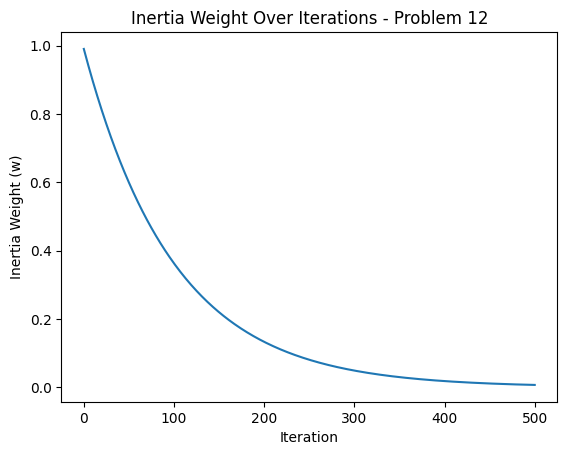

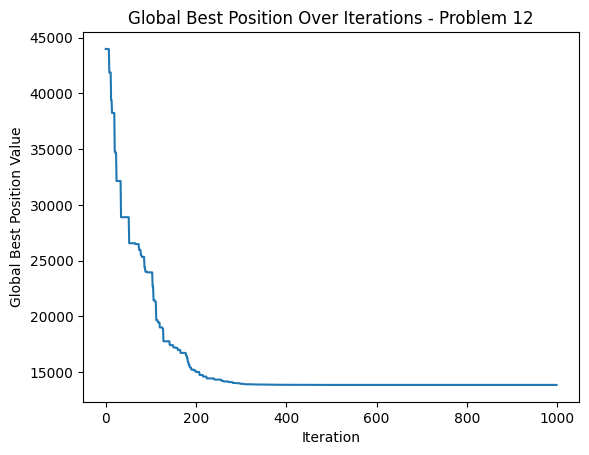




Problem 13 Best Cost: [163284.55793528 104024.89693349  52637.44599678  52637.44599678
  52637.44599678  52637.44599678  52637.44599678  52637.44599678
  52637.44599678  46350.18359287  46350.18359287  46350.18359287
  46350.18359287  46350.18359287  46350.18359287  46350.18359287
  46350.18359287  46350.18359287  46350.18359287  46350.18359287
  46350.18359287  46350.18359287  46350.18359287  46350.18359287
  46350.18359287  46350.18359287  46350.18359287  46350.18359287
  46350.18359287  46350.18359287  46350.18359287  46350.18359287
  46350.18359287  46350.18359287  46350.18359287  46350.18359287
  46350.18359287  41042.03023646  41042.03023646  41042.03023646
  41042.03023646  41042.03023646  41042.03023646  41042.03023646
  41042.03023646  41042.03023646  41042.03023646  41042.03023646
  41042.03023646  41042.03023646  41042.03023646  41042.03023646
  41042.03023646  41042.03023646  41042.03023646  41042.03023646
  41042.03023646  41042.03023646  41042.03023646  33815.82882936


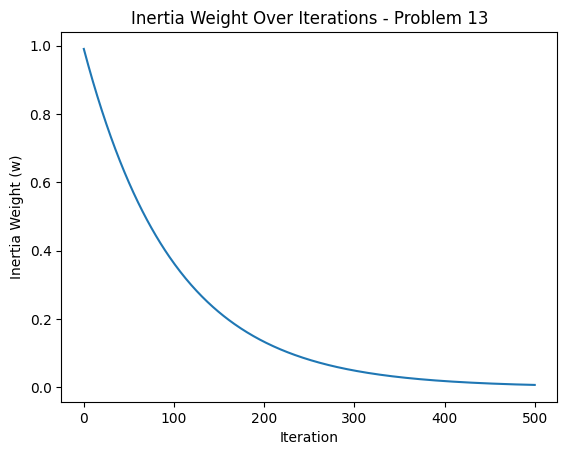

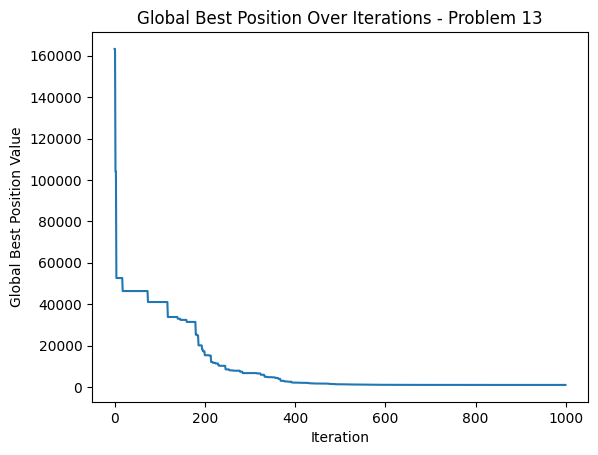




Problem 14 Best Cost: [24789.66485035 23417.24130846 21848.03545039 21848.03545039
 21218.81060799 21217.68168844 21155.56774617 21155.56774617
 21155.56774617 20776.32858766 20717.83696364 20717.83696364
 20221.6310559  20221.6310559  20221.6310559  20221.6310559
 20221.6310559  20221.6310559  19971.55546761 19971.55546761
 19930.48919865 19930.48919865 19930.48919865 19930.48919865
 19670.42547072 19670.42547072 19670.42547072 19518.14555635
 19518.14555635 19518.14555635 19518.14555635 19262.32654496
 19262.32654496 19262.32654496 19262.32654496 19262.32654496
 19262.32654496 19262.32654496 19221.29785034 19164.68057606
 19160.12129564 19160.12129564 19114.75818241 19065.56864263
 19063.21993122 19063.21993122 19063.21993122 19029.1630945
 19000.58942201 19000.58942201 18988.37186115 18988.37186115
 18988.37186115 18984.22851012 18816.21836307 18816.21836307
 18804.12391326 18804.12391326 18804.12391326 18530.44229427
 18530.44229427 17880.77859921 17785.36058627 16900.7852347
 1

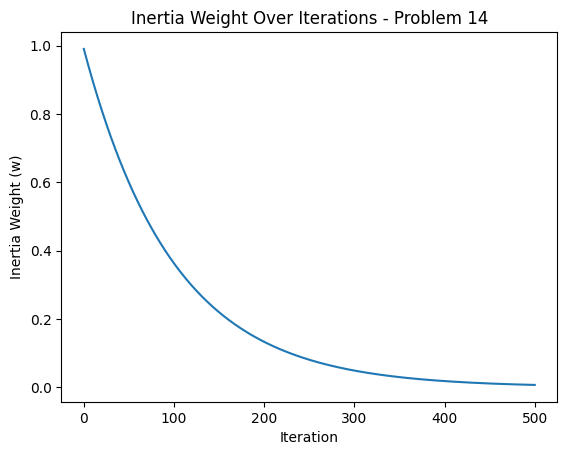

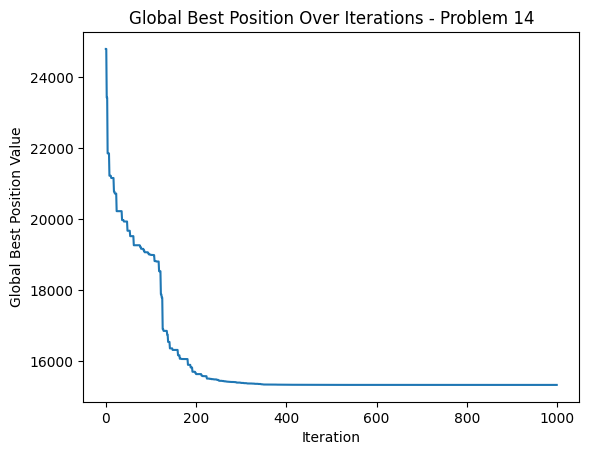




Problem 15 Best Cost: [-225.82072582 -225.82072582 -225.82072582 -225.82072582 -225.82072582
 -225.82072582 -225.82072582 -225.82072582 -225.87847432 -226.45155724
 -226.45155724 -226.45155724 -226.45155724 -226.45155724 -226.45155724
 -226.45155724 -226.45155724 -226.65490713 -226.65490713 -226.65490713
 -226.85350184 -226.85350184 -226.85350184 -226.85350184 -227.35873236
 -227.35873236 -227.35873236 -227.72109864 -227.72109864 -227.72109864
 -227.72109864 -227.72109864 -227.72109864 -227.72109864 -227.72109864
 -227.72109864 -227.72109864 -227.72109864 -227.7615027  -227.7615027
 -227.78303486 -227.78303486 -227.81541156 -227.84061995 -227.84061995
 -227.88199474 -227.88199474 -227.88199474 -227.88199474 -227.88199474
 -227.91406042 -227.91796825 -227.91796825 -227.91796825 -227.91968135
 -227.94739015 -227.94739015 -227.94739015 -227.94739015 -227.94739015
 -227.94739015 -227.9617546  -227.96793344 -227.98119016 -227.98119016
 -227.98119016 -227.98119016 -227.98119016 -227.98119

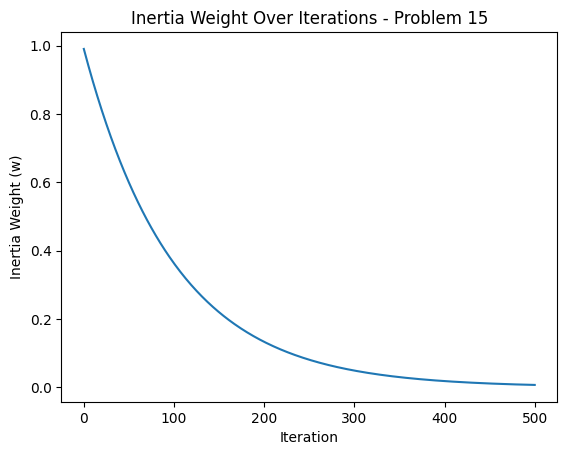

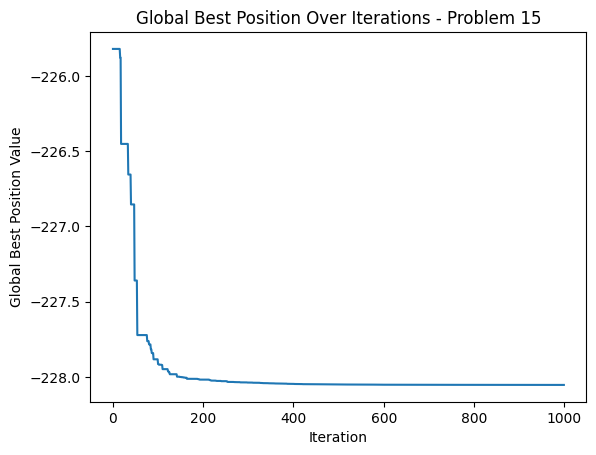




Problem 16 Best Cost: [54400.77737898 44198.14635158 34958.03266129 25450.86721699
 17418.01432368  8683.49290322  4132.3411357   4132.3411357
  3298.36378655  3089.31365133  1902.81372035   831.22748067
   177.88359859  -477.46259634 -1552.95643496 -2331.9643347
 -2449.25915559 -2638.75786026 -2638.75786026 -2977.0044865
 -3357.64689149 -3495.99694683 -3495.99694683 -3495.99694683
 -3555.79931838 -3568.2996873  -3656.25779663 -3783.2872341
 -3783.2872341  -3865.30725734 -3912.54241076 -3912.54241076
 -4006.59924884 -4006.59924884 -4036.06167355 -4036.06167355
 -4036.06167355 -4067.99447995 -4109.09927589 -4109.09927589
 -4110.63257384 -4116.31702964 -4116.44263533 -4159.03000703
 -4159.03000703 -4159.03000703 -4159.03000703 -4167.99024885
 -4197.76606349 -4214.89665658 -4214.89665658 -4258.76342608
 -4258.76342608 -4258.76342608 -4258.76342608 -4263.15366068
 -4263.15366068 -4263.15366068 -4263.15366068 -4267.01530964
 -4273.74900393 -4273.74900393 -4275.6840656  -4279.44035109
 -4

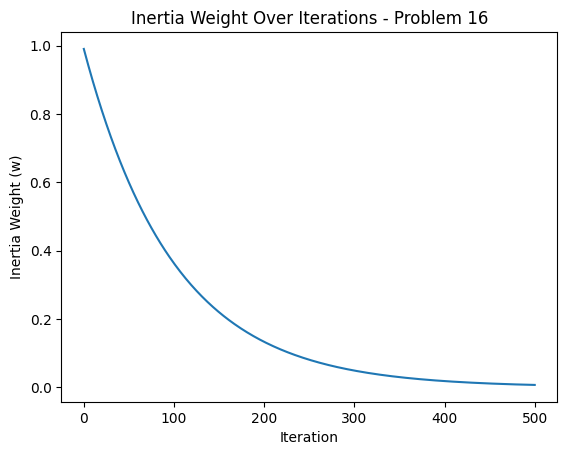

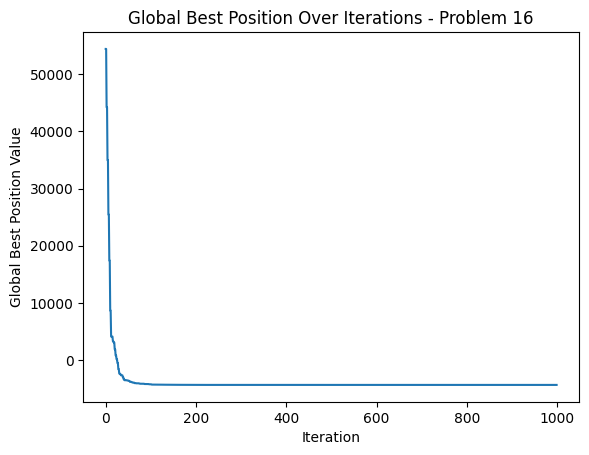




Problem 17 Best Cost: [ 3.03859962e+06  2.48481683e+06  1.97207227e+06  1.59085510e+06
  1.13747123e+06  7.94933806e+05  5.84272167e+05  4.91827707e+05
  4.91827707e+05  3.95873088e+05  3.20604480e+05  2.31131175e+05
  1.92139272e+05  1.92139272e+05  1.26463613e+05  6.30836338e+04
  5.61248342e+04  5.61248342e+04  5.61248342e+04  5.23335325e+04
  5.07502916e+04  4.83301469e+04  4.83301469e+04  4.83301469e+04
  2.69837860e+04  2.69837860e+04  2.27519949e+04  2.27519949e+04
  1.88304624e+04  1.63513803e+04  1.50349480e+04  1.14692668e+04
  1.14692668e+04  1.14692668e+04  1.14692668e+04  9.04620285e+03
  9.04620285e+03  9.04620285e+03  4.73930277e+03  4.37966601e+03
  4.20962568e+03  3.93837254e+03  2.81853321e+03  2.81853321e+03
  2.81853321e+03  2.55177012e+03  2.45685770e+03  2.14417790e+03
  1.41488018e+03  6.67389200e+02  4.34625440e+02  2.72787575e+02
  2.72787575e+02  2.72787575e+02 -5.08496894e+02 -5.08496894e+02
 -5.13841550e+02 -5.13841550e+02 -5.34998514e+02 -9.37762716e+02


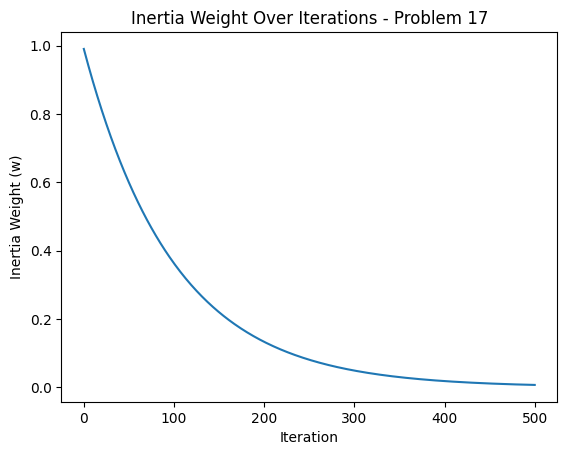

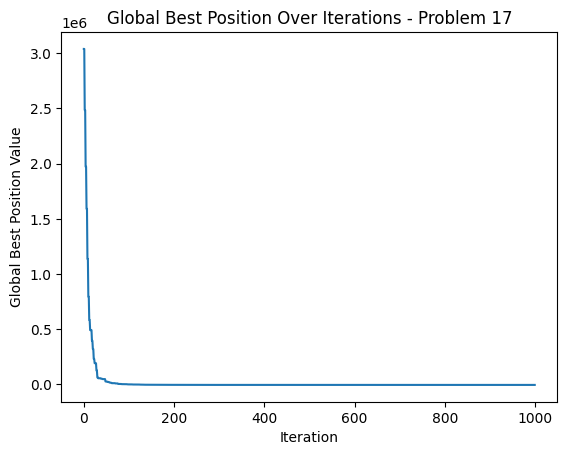




Problem 18 Best Cost: [40087.19319589 37741.77696152 34938.53141183 34938.53141183
 31054.21600897 31054.21600897 31054.21600897 30558.79253065
 30558.79253065 28457.88073981 28457.88073981 28457.88073981
 28457.88073981 28457.88073981 28457.88073981 28457.88073981
 28457.88073981 25973.21128712 25973.21128712 25973.21128712
 25973.21128712 25973.21128712 25973.21128712 25569.74819125
 25569.74819125 23596.89915083 23239.1596341  23239.1596341
 23239.1596341  22988.07297706 22597.51982319 22597.51982319
 22597.51982319 22597.51982319 22597.51982319 22360.8804104
 22299.22655443 21478.47882735 21478.47882735 21478.47882735
 21302.7464329  21302.7464329  21231.4847625  21231.4847625
 21156.26392873 20492.44421459 20492.44421459 20492.44421459
 20492.44421459 20350.38830987 20263.23273392 20249.20520324
 20249.20520324 20233.3977178  20001.28890054 20001.28890054
 20001.28890054 20001.28890054 19946.26156464 19735.71203842
 19735.71203842 19735.71203842 19735.71203842 19735.71203842
 1

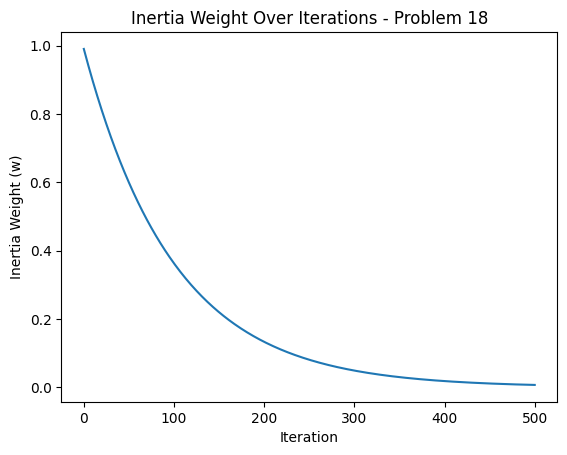

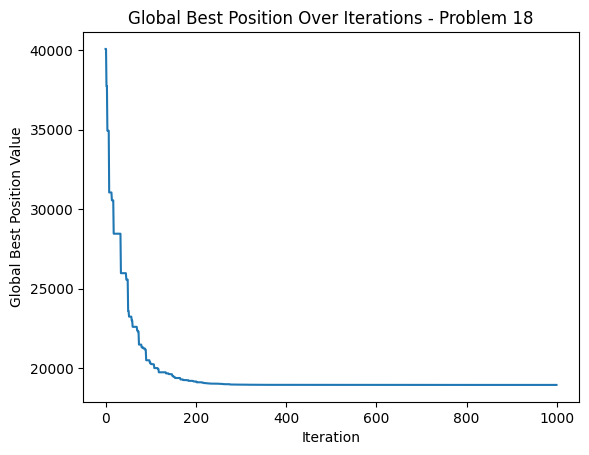




Problem 19 Best Cost: [49336.0447754  43503.82396263 39572.9405757  34230.64461147
 34230.64461147 30513.46334546 30513.46334546 30211.46672782
 30211.46672782 30211.46672782 30211.46672782 30211.46672782
 30211.46672782 23658.11747049 22119.08261108 20286.33991143
 20286.33991143 20286.33991143 20286.33991143 20286.33991143
 20286.33991143 20286.33991143 20286.33991143 20286.33991143
 20286.33991143 20286.33991143 20286.33991143 20286.33991143
 20286.33991143 20286.33991143 20286.33991143 20286.33991143
 20286.33991143 20286.33991143 20286.33991143 19915.02331773
 19915.02331773 19915.02331773 19915.02331773 19915.02331773
 19915.02331773 19915.02331773 19915.02331773 19915.02331773
 19915.02331773 19915.02331773 19486.20320664 19486.20320664
 19486.20320664 19486.20320664 19486.20320664 19486.20320664
 19486.20320664 19486.20320664 19486.20320664 19486.20320664
 19486.20320664 19486.20320664 19486.20320664 19486.20320664
 19486.20320664 19486.20320664 19486.20320664 19486.20320664

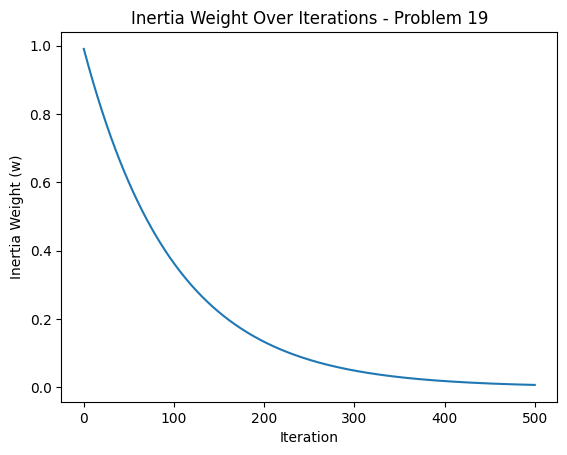

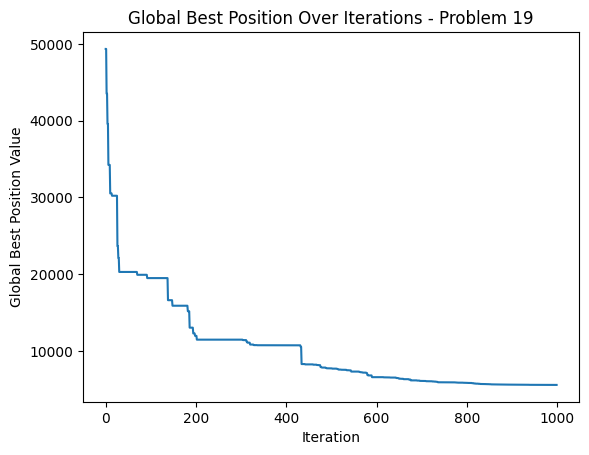




Problem 20 Best Cost: [-83.59747743 -86.18073593 -88.2545178  -89.81861609 -89.81861609
 -90.2519686  -90.2519686  -90.2519686  -90.2519686  -90.2519686
 -90.2519686  -90.2519686  -91.00197052 -91.00197052 -91.13899739
 -91.13899739 -91.42417659 -91.57426086 -91.76972062 -91.76972062
 -91.76972062 -91.80366846 -91.80366846 -92.06227019 -92.06227019
 -92.06227019 -92.83252657 -92.83252657 -93.06299483 -93.06299483
 -93.13073339 -93.13073339 -93.74383577 -93.74383577 -93.74383577
 -93.74383577 -93.74383577 -93.74383577 -93.74383577 -93.74383577
 -93.74383577 -93.74383577 -93.74383577 -93.74383577 -93.74383577
 -93.74383577 -94.01299328 -94.01299328 -94.01299328 -94.01299328
 -94.01299328 -94.09213951 -94.09213951 -94.09213951 -94.09213951
 -94.09213951 -94.15296309 -94.15296309 -94.15296309 -94.15296309
 -94.15296309 -94.15296309 -94.15296309 -94.15296309 -94.15296309
 -94.15296309 -94.15296309 -94.15296309 -94.15296309 -94.15296309
 -94.15296309 -94.15296309 -94.15296309 -94.15296309

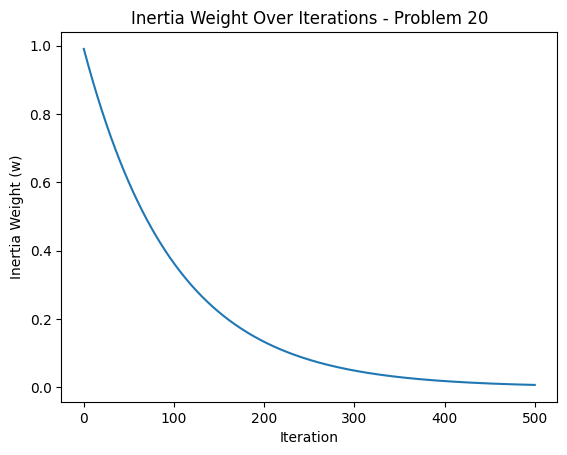

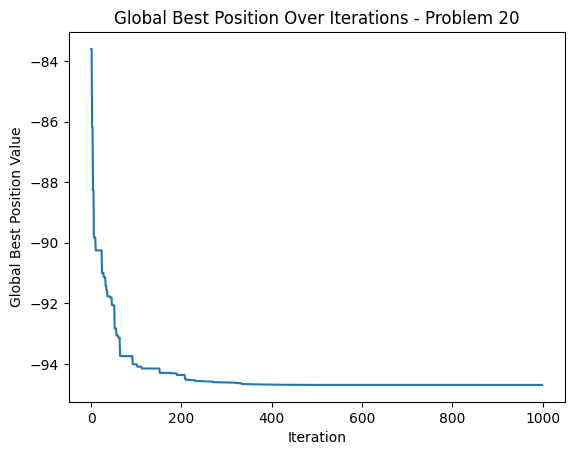




Problem 21 Best Cost: [-44.83860002 -44.87859799 -44.87859799 -44.87859799 -44.88314988
 -44.88314988 -44.88919123 -44.88919123 -44.88919123 -44.88919123
 -44.88919123 -44.89172528 -44.89172528 -44.89434185 -44.89434185
 -44.89471353 -44.89471353 -44.89471353 -44.89471353 -44.89471353
 -44.89471353 -44.89471353 -44.89471353 -44.89471353 -44.89471353
 -44.8982551  -44.8982551  -44.8982551  -44.8982551  -44.8982551
 -44.90124277 -44.90124277 -44.90774168 -44.90774168 -44.90774168
 -44.90774168 -44.91220524 -44.91584546 -44.91584546 -44.91990381
 -44.91990381 -44.91990381 -44.91990381 -44.92172754 -44.92405772
 -44.92405772 -44.92405772 -44.92684758 -44.92684758 -44.92826382
 -44.92826382 -44.92826382 -44.92826382 -44.92826382 -44.92826382
 -44.92826382 -44.92826382 -44.92826382 -44.92885849 -44.92921836
 -44.92921836 -44.92922952 -44.92922952 -44.92922952 -44.92922952
 -44.92931222 -44.93155241 -44.93495811 -44.93495811 -44.93935646
 -44.93935646 -44.94077865 -44.94077865 -44.94184088

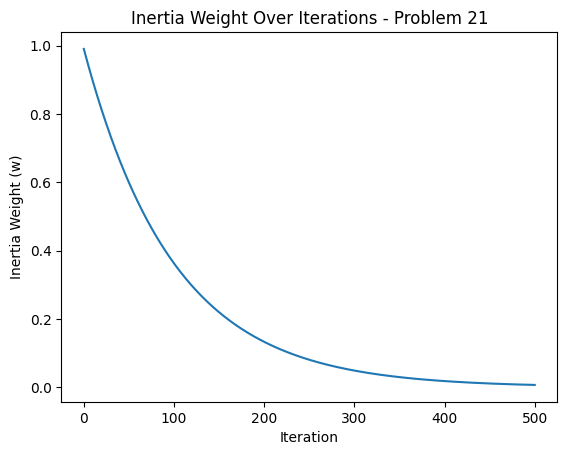

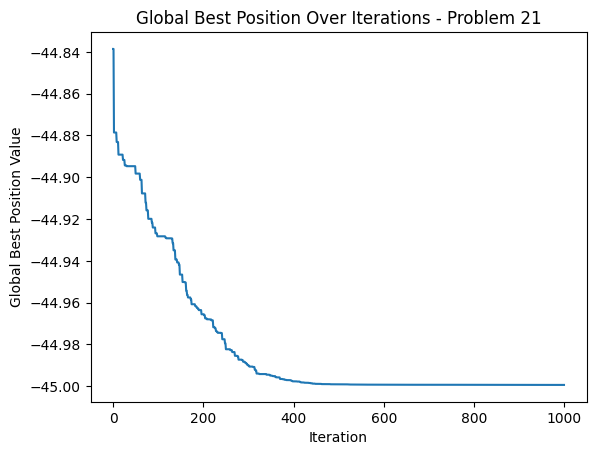




Problem 22 Best Cost: [241902.0574866  227275.92842151 227275.92842151 199744.18852146
 192030.66307963 192030.66307963 189548.18607914 185182.32513727
 177360.99050119 177360.99050119 177360.99050119 166257.51836947
 166257.51836947 166257.51836947 163730.57763306 163730.57763306
 163730.57763306 163730.57763306 157083.6451564  157083.6451564
 157083.6451564  157083.6451564  157083.6451564  157083.6451564
 157083.6451564  157083.6451564  157083.6451564  157083.6451564
 157083.6451564  157083.6451564  157083.6451564  154471.91115871
 154471.91115871 151073.40424109 151073.40424109 129096.21697336
 129096.21697336 129096.21697336 122805.77191775 122805.77191775
 122805.77191775 122805.77191775 122805.77191775 108481.73400827
 108481.73400827 101486.96096474 100754.24731301 100754.24731301
 100754.24731301 100754.24731301  99973.76759237  99973.76759237
  99973.76759237  99973.76759237  97403.67227131  97403.67227131
  95826.85764743  95826.85764743  95826.85764743  94699.66931433
  9

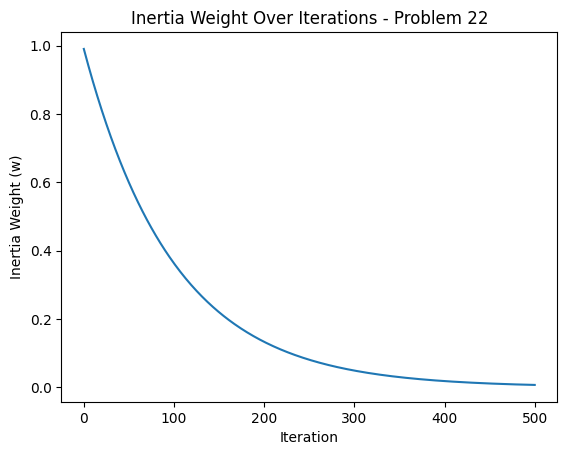

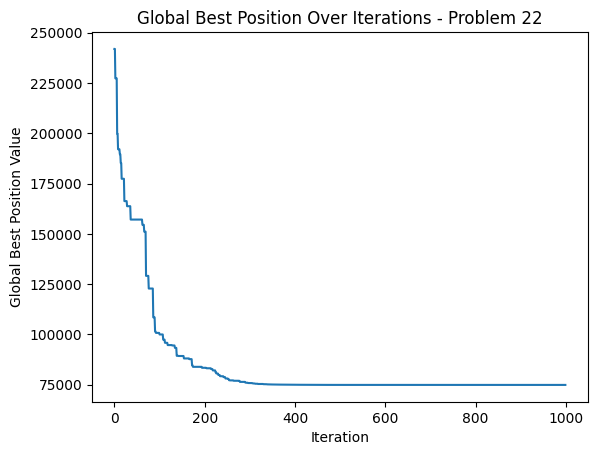




Problem 23 Best Cost: [-23.42481126 -23.42481126 -23.42481126 -28.8922543  -33.96162059
 -33.96162059 -36.33936175 -36.33936175 -36.33936175 -39.43193643
 -39.43193643 -39.43193643 -39.43193643 -39.43193643 -39.43193643
 -39.43193643 -39.43193643 -39.43193643 -39.43193643 -39.43193643
 -40.83125437 -42.71038394 -42.71038394 -42.71038394 -42.71038394
 -42.71038394 -42.71038394 -42.71038394 -42.71038394 -42.71038394
 -42.71038394 -44.34561933 -44.34561933 -44.34561933 -46.87972511
 -46.87972511 -46.87972511 -46.87972511 -47.25494322 -47.25494322
 -47.8726781  -47.8726781  -48.32478542 -48.32478542 -48.32478542
 -48.49504194 -48.49504194 -48.49504194 -48.49504194 -48.49504194
 -49.06698051 -49.47334459 -49.47334459 -49.47334459 -49.47334459
 -50.81656726 -50.81656726 -50.81656726 -51.06105479 -51.06105479
 -51.2013209  -51.2013209  -51.2013209  -51.23970407 -51.39487539
 -51.39487539 -51.39487539 -51.41314103 -52.17803074 -52.17803074
 -52.17803074 -53.13100254 -53.13100254 -53.1310025

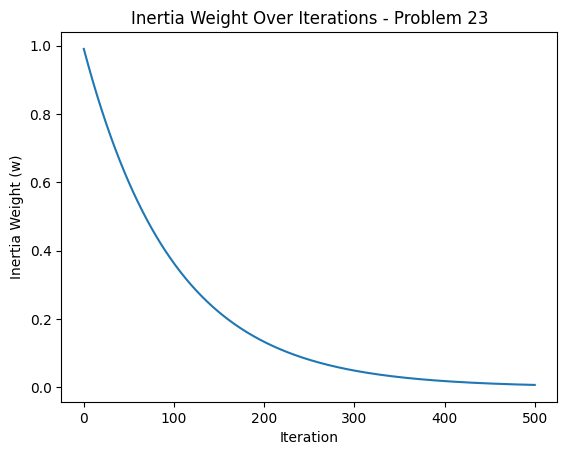

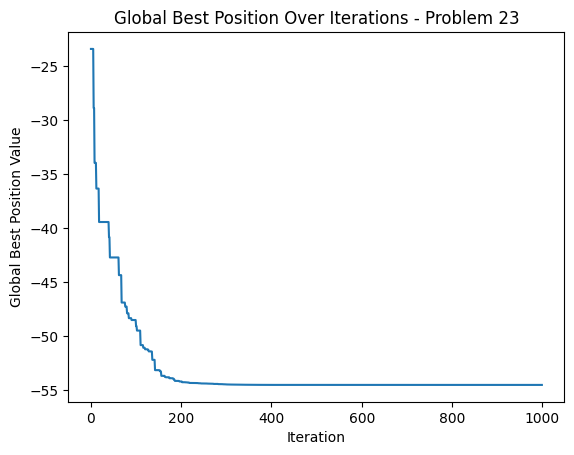




Problem 24 Best Cost: [105.0464582  101.64247952  97.38949316  97.38949316  81.83390818
  81.83390818  81.83390818  81.83390818  81.83390818  76.24438863
  71.90411785  65.78069476  58.96790325  49.2193251   41.71209875
  41.71209875  41.71209875  41.71209875  41.71209875  41.71209875
  41.71209875  41.71209875  41.71209875  41.71209875  41.71209875
  41.71209875  35.53916674  35.53916674  35.53916674  35.53916674
  35.53916674  35.53916674  35.53916674  35.53916674  35.53916674
  34.9722026   34.9722026   34.66034498  34.66034498  30.10528723
  30.10528723  30.10528723  29.46454175  29.46454175  29.46454175
  29.46454175  29.46454175  29.46454175  29.46454175  29.46454175
  29.46454175  29.46454175  29.46454175  29.46454175  27.65735439
  27.65735439  27.65735439  27.65735439  27.65735439  27.65735439
  27.65735439  27.65735439  27.65735439  27.65735439  27.65735439
  27.53730323  27.53730323  25.92639739  25.92639739  25.92639739
  25.92639739  25.92639739  25.92639739  25.9263973

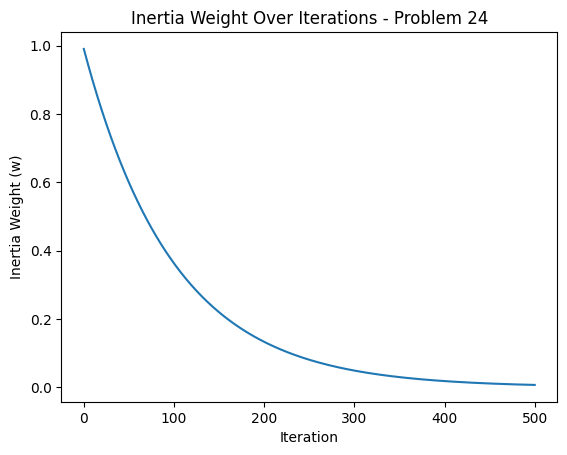

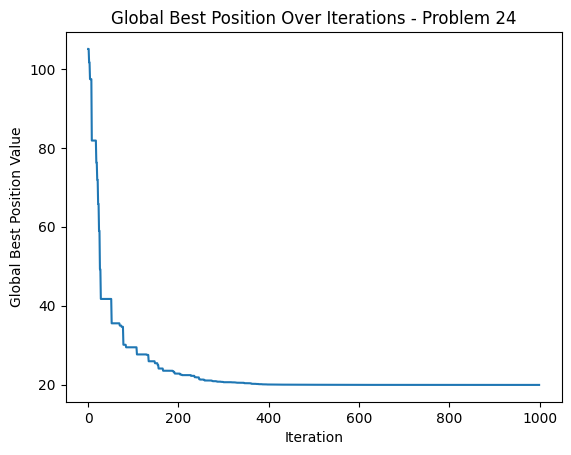

In [48]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [49]:
print('nice')

nice


In [50]:
print('almost complete')

almost complete


In [51]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [52]:
print('ok')

ok


In [53]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [54]:
# print(w_response)